In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

So rough order:

1) use the value they give us
2) build in my own models for the parameters

Methodlogy:

Type stuff in to big database with index as type
data we need to do it:


In [126]:
df = None
df = pd.DataFrame({'Name': ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'C', 'V6', 'V5', 'V4', 'V3', 'V2', 'V1'], 
                   'Number': [1, 2, 4, 8, 16, 32, 64, 32, 16, 8, 4, 2, 1],
                   'Diameter(µm)': [23.97, 19.17, 15.28, 12.08, 9.46, 7.32, 8, 11.51, 14.53, 17.79, 21.45, 25.70, 30.77],
                   'Length(µm)': [1267.6, 930.3, 543.6, 302.3, 161.2, 154.7, 243.9, 473.9, 272.3, 426.6, 632.5, 844.2, 936.3],
                   'Viscocity(mPAs)': [1.59, 1.50, 1.42, 1.34, 1.28, 1.23, 1.24, 1.33, 1.40, 1.48, 1.55, 1.62, 1.7],
                   'Pressure Drop(mmHg)': [6.93, 5.87, 4.02, 2.70, 1.82, 2.35, 2.62, 1.27, 0.61, 0.89, 1.31, 1.78, 2.01]})

df['Diameter(µm)'] = df['Diameter(µm)']*1e-6
df['Length(µm)'] = df['Length(µm)']*1e-6
df['Viscocity(mPAs)'] = df['Viscocity(mPAs)']*1e-3
df['Pressure Drop(mmHg)'] = df['Pressure Drop(mmHg)']*133.322
df = df.rename(columns={'Diameter(µm)':'Diameter(m)', 'Length(µm)':'Length(m)', 'Viscocity(mPAs)':'Viscocity(PAs)', 'Pressure Drop(mmHg)':'Pressure Drop(Pa)'})

In [127]:
#These are aross each pressure drop (explains the doubled resistance for the capillaries as in paralell so have half the flow each (flow is shared))
df['Resistance for U'] = 32 * df['Viscocity(PAs)'] * df['Length(m)'].div(df['Diameter(m)']**2)
df['Resistance for Q'] = 128 * df['Viscocity(PAs)'] * df['Length(m)'].div(math.pi*(df['Diameter(m)']**4))

df.loc[df.index[df['Name'] == 'C'][0],'Resistance for U'] = df.loc[df.index[df['Name'] == 'C'][0],'Resistance for U']*2
df.loc[df.index[df['Name'] == 'C'][0],'Resistance for Q'] = df.loc[df.index[df['Name'] == 'C'][0],'Resistance for Q']*2

In [128]:
df['U in single(m/s)'] = df['Pressure Drop(Pa)'].div(df['Resistance for U'])
df['Q in single(m^3/s)'] = df['Pressure Drop(Pa)'].div(df['Resistance for Q'])

###As the two capillaries are in paralell, the effective pressure drop is halved. Or another way of looking at it is
#that the overall resitance is halved. Not sure best way to put this into model.

####Can i replace Q

Text(0.5, 1.0, 'Resistance for Q')

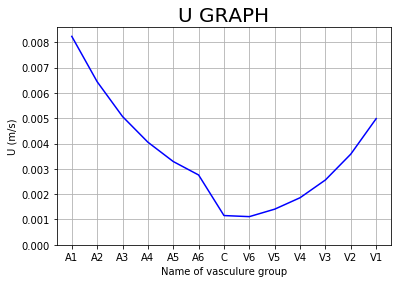

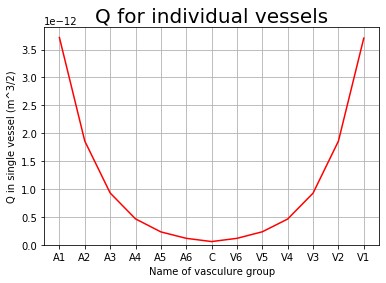

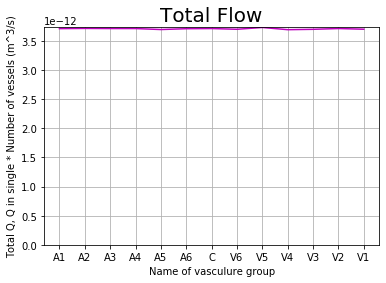

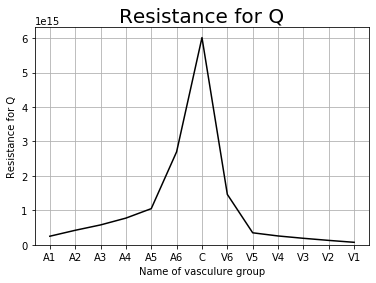

In [129]:
fig,ax = plt.subplots()
plt.plot(df['Name'],df['U in single(m/s)'], color='b')
plt.grid(which='both')
plt.ylabel('U (m/s)')
plt.xlabel('Name of vasculure group')
ax.set_ylim(bottom=0)
plt.title('U GRAPH', fontsize=20)
#plt.show()

fig,ax = plt.subplots()
plt.plot(df['Name'],df['Q in single(m^3/s)'], color='r')
plt.grid(which='both')
plt.ylabel('Q in single vessel (m^3/2)')
plt.xlabel('Name of vasculure group')
ax.set_ylim(bottom=0)
plt.title('Q for individual vessels', fontsize=20)
#plt.show()

#fig,ax = plt.subplots()
#plt.plot(df['Name'],df['Number'], color='g')
#plt.grid(which='both')
#plt.ylabel('Number of vessels')
#plt.xlabel('Name of vasculure group')
#ax.set_ylim(bottom=0)
#plt.title('Number against type', fontsize=20)

fig,ax = plt.subplots()
plt.plot(df['Name'],df['Q in single(m^3/s)']*df['Number'], color='m')
plt.grid(which='both')
plt.ylabel('Total Q, Q in single * Number of vessels (m^3/s)')
plt.xlabel('Name of vasculure group')
ax.set_ylim(bottom=0)
plt.title('Total Flow', fontsize=20)

fig,ax = plt.subplots()
plt.plot(df['Name'],df['Resistance for Q'], color='k')
plt.grid(which='both')
plt.ylabel('Resistance for Q')
plt.xlabel('Name of vasculure group')
ax.set_ylim(bottom=0)
plt.title('Resistance for Q', fontsize=20)